### Digit recognizer

##### Importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler  
from sklearn import metrics
from sklearn.model_selection import KFold,cross_val_score,train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

##### Reading Train, Test data set

In [2]:
train = pd.read_csv(r'D:\course\predictive analysis 2 course 4\digit-recognizer\train.csv')


In [3]:
test = pd.read_csv(r'D:\course\predictive analysis 2 course 4\digit-recognizer\test.csv')

##### Analysing data

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.shape

(42000, 785)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [7]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


##### Checking missing value

In [8]:
missingvalue= train.isnull().sum()
missingvalue[missingvalue>0]

Series([], dtype: int64)

In [9]:
sorted(train.label.unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

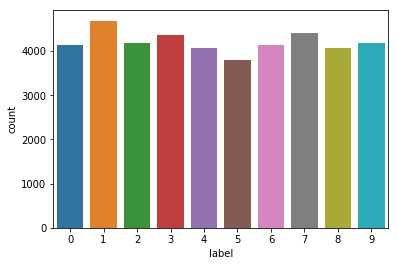

In [10]:
sns.countplot(train.label)

##### No bias or insufficient data for any class

In [11]:
train_copy = train.copy()

In [12]:
sampledtrain = train.sample(int((train.shape[0]*20)/100))
X = sampledtrain.drop('label',axis =1)
y = sampledtrain['label']
X.shape,y.shape

((8400, 784), (8400,))

In [13]:
X = train.drop('label',axis =1)
y = train['label']
X.shape,y.shape

((42000, 784), (42000,))

##### Train and Test split

In [14]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.8,train_size =0.2,random_state =101)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8400, 784)
(33600, 784)
(8400,)
(33600,)


##### Scaling the data set

In [16]:
scaler = StandardScaler()
X_train_scaled =scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### SVM Linear Kernal

In [17]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train_scaled, y_train)

# predict
y_pred = model_linear.predict(X_test_scaled)
print("Linear kernal Accuracy: ",metrics.accuracy_score(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

Linear kernal Accuracy:  0.9132440476190476
[[3186    0   11    4   11   23   31    3   14    2]
 [   0 3677   14   11    5    7    4    8   30    4]
 [  35   29 3028   52   55    9   34   41   48   12]
 [  15   12  105 3046    7  185    5   22   54   24]
 [   8   14   32    2 3059    4   26   31    6  108]
 [  28   23   29  133   41 2628   44   12   73   28]
 [  27    9   44    4   27   31 3116    0   19    0]
 [   6   24   38   19   55   10    3 3214    4  131]
 [  13   49   49  117   19  110   31   17 2843   24]
 [  20   17   20   24  172   20    4  164   26 2888]]


##### SVM Polynomial Kernal

In [18]:
# linear model

model_poly = SVC(kernel='poly')
model_poly.fit(X_train_scaled, y_train)

# predict
y_pred = model_poly.predict(X_test_scaled)
print("Poly kernal Accuracy: ",metrics.accuracy_score(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

C:\Users\VJT\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Poly kernal Accuracy:  0.871875
[[2888    0    9    3   37   16   28    0  301    3]
 [   0 3685   11    1   12    0    6    0   43    2]
 [  17   21 2491   38  141    1   12   20  590   12]
 [   0   18   26 2884   23   31    3   15  430   45]
 [   4   10   15    0 3075    8    3    6   20  149]
 [   6    4    5   76   71 2359   31    8  434   45]
 [  18    9   10    0  105   42 2903    2  188    0]
 [   1   44    7    5  130    4    0 2862  109  342]
 [   1   22    5   32   20   41    2    4 3123   22]
 [   6   12    1   15  157    9    0   43   87 3025]]


##### SVM RBF Kernal

In [ ]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train_scaled, y_train)

# predict
y_pred = non_linear_model.predict(X_test_scaled)
print("Accuracy: ",metrics.accuracy_score(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

C:\Users\VJT\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


##### Tuning Hyperparameter

In [ ]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2,1e-3,1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs = -1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_scaled, y_train)   

In [29]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,113.350161,2.126243,15.159627,0.067591,1,0.01,"{'C': 1, 'gamma': 0.01}",0.755952,0.751190,0.747619,0.727976,0.731548,0.742857,0.011072,12,1.000000,0.999851,0.999851,1.000000,1.000000,0.999940,0.000073
1,27.591210,0.818937,8.592475,0.100415,1,0.001,"{'C': 1, 'gamma': 0.001}",0.936905,0.927381,0.934524,0.930952,0.923214,0.930595,0.004903,4,0.972173,0.972024,0.971280,0.972321,0.973512,0.972262,0.000720
2,39.143858,0.558381,11.606073,0.104451,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.911310,0.904762,0.907738,0.893452,0.899405,0.903333,0.006295,8,0.915179,0.917857,0.916518,0.921280,0.920685,0.918304,0.002353
3,112.865092,1.892104,14.989046,0.086354,10,0.01,"{'C': 10, 'gamma': 0.01}",0.766667,0.771429,0.769048,0.751190,0.748810,0.761429,0.009482,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,23.385619,0.298997,7.745043,0.081628,10,0.001,"{'C': 10, 'gamma': 0.001}",0.941071,0.941667,0.944048,0.936310,0.933929,0.939405,0.003715,1,0.999405,0.999554,0.999405,0.999256,0.999107,0.999345,0.000152
5,17.962601,0.320651,7.165001,0.080936,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.934524,0.924405,0.930952,0.925595,0.922619,0.927619,0.004432,5,0.957738,0.959077,0.959077,0.957738,0.959375,0.958601,0.000713
6,112.729012,1.472852,15.090364,0.032539,100,0.01,"{'C': 100, 'gamma': 0.01}",0.766667,0.771429,0.769048,0.751190,0.748810,0.761429,0.009482,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,23.167899,0.646363,7.691640,0.056072,100,0.001,"{'C': 100, 'gamma': 0.001}",0.940476,0.939286,0.945238,0.936905,0.935119,0.939405,0.003459,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,13.997653,0.315557,5.903314,0.090144,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.930357,0.922024,0.926786,0.927381,0.920238,0.925357,0.003700,6,0.993899,0.994196,0.995089,0.993006,0.994048,0.994048,0.000665
9,113.650279,2.117876,14.991254,0.152746,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.766667,0.771429,0.769048,0.751190,0.748810,0.761429,0.009482,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


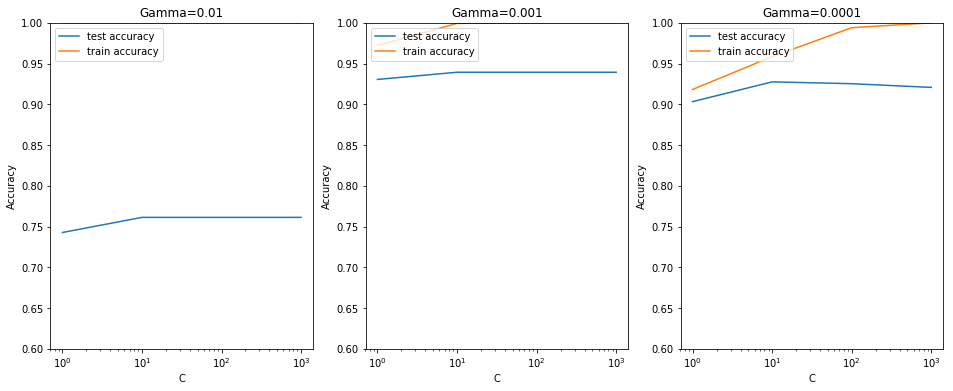

In [30]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


##### Dispalying best gamma and C paramter

In [31]:
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9394047619047619 corresponding to hyperparameters {'C': 10, 'gamma': 0.001}


In [32]:
# model with optimal hyperparameters

# model

model = SVC(C=best_hyperparams['C'], gamma=best_hyperparams['gamma'], kernel="rbf")

model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

accuracy 0.9474702380952381 

[[3213    0   10    2    4   11   26   10    7    2]
 [   0 3692   17    9    6    4    5   17    7    3]
 [  14   13 3128   29   28    7   19   76   21    8]
 [   4    5   54 3234    4   77    1   45   31   20]
 [   5    9   30    2 3115    5   22   30    9   63]
 [  14    8    9   60   15 2815   32   37   32   17]
 [  19    6   12    0   10   18 3165   37   10    0]
 [   5   18   26   11   28    4    1 3353    4   54]
 [   9   16   27   53   14   50   18   34 3040   11]
 [   9    9   12   19   80   10    0  115   21 3080]] 



In [0]:
confusionmatrix = metrics.confusion_matrix(y_test, y_pred)

In [34]:
confusionmatrix.diagonal()

array([3213, 3692, 3128, 3234, 3115, 2815, 3165, 3353, 3040, 3080])

In [35]:
confusionmatrix.sum(axis=1)

array([3285, 3760, 3343, 3475, 3290, 3039, 3277, 3504, 3272, 3355])

##### class wise accuracy

In [36]:

Classwiseaccuracy=confusionmatrix.diagonal()/confusionmatrix.sum(axis=1)
Accuracy_df =pd.DataFrame(Classwiseaccuracy,columns=['Accuracy'],index=np.arange(0,10))
Accuracy_df.index.name='Digits'
Accuracy_df.sort_values(by='Accuracy',ascending = False)


,Accuracy
Digits,
1,0.981915
0,0.978082
6,0.965822
7,0.956906
4,0.946809
2,0.935687
3,0.930647
8,0.929095
5,0.926292


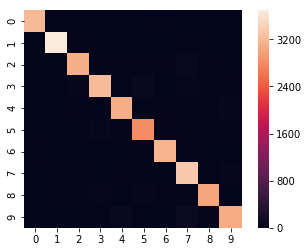

In [37]:

sns.heatmap(confusionmatrix, square=True)

##### Orginal test data set prediction


In [0]:
test_scaled = scaler.transform(test)

In [0]:
y_pred = model.predict(test_scaled)

df=pd.DataFrame(y_pred,columns=['Label'],index=np.arange(1,28001))

###### writing predicted digits into csv file 

In [0]:
df.to_csv('submission.csv',index_label='ImageId')

##### Displaying the digits in test data set and predicted values randomly

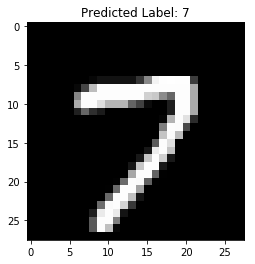

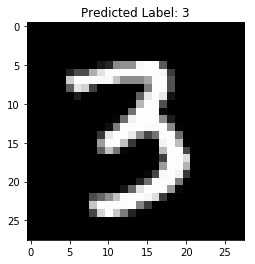

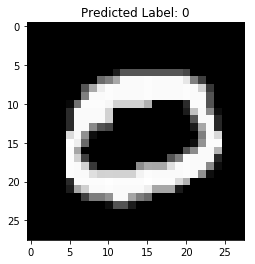

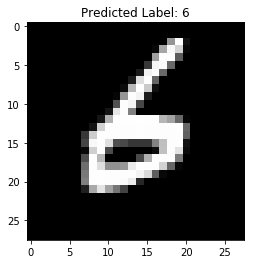

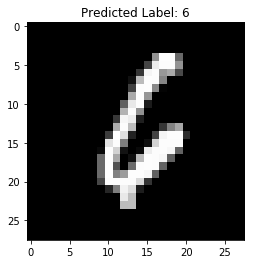

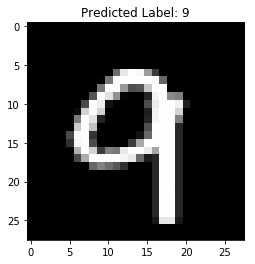

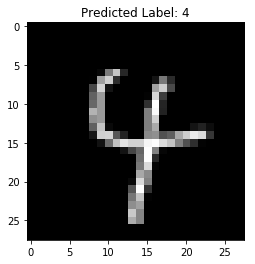

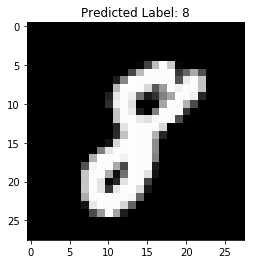

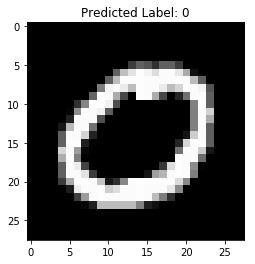

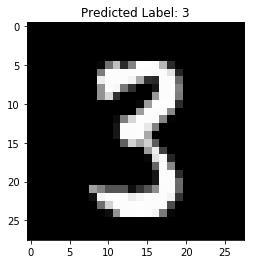

In [58]:
randomnum = np.random.randint(1,400,10)
for i in randomnum:
    digitimg = np.reshape(test.loc[i,:].values, (28, 28))
    plt.title('Predicted Label: {0}'.format(y_pred[i]))
    plt.imshow(digitimg, interpolation='nearest',cmap='gray')
    plt.show()